# Import the necessary libraries and read data

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('adm_data.csv')

# EDA

## Basic EDA

In [16]:
def dataoverview(df, message):
    print(f'{message}:')
    print('\nInfo: ')
    print(df.info())
    print('\nDescribe: ')
    print(df.describe())
    print('\nRows: ', df.shape[0])
    print('\nNumber of features: ', df.shape[1])
    print('\nFeatures: ')
    print(df.columns.tolist())
    print('\nMissing values: ', df.isnull().sum().values.sum())
    print('\nUnique values: ')
    print(df.nunique())
    dups = df.duplicated()
    print("Duplicate Rows",df[dups])
    plt.figure(figsize=(10,12))
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

A Overview about the adm dataset:
5 first rows: 
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    

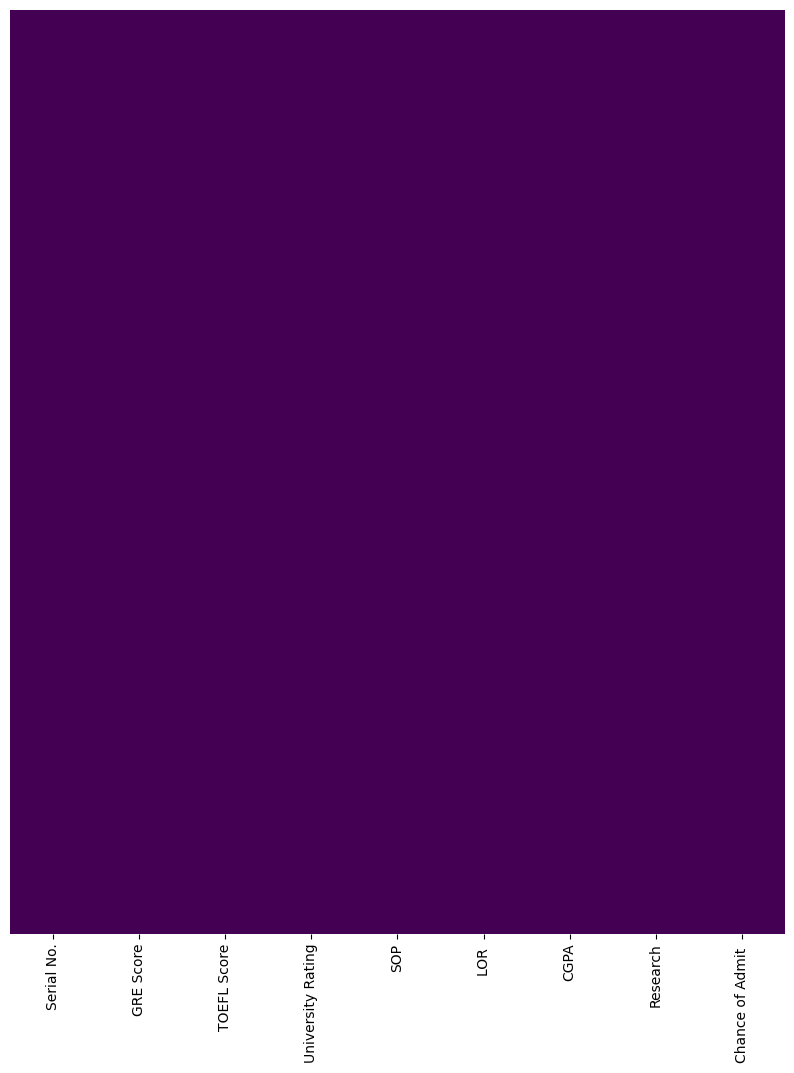

In [19]:
dataoverview(df, 'A Overview about the adm dataset')

## Data Cleaning

In [27]:
df.columns = df.columns.str.strip()
df.to_csv('adm_data_clean.csv', index=False)

## Visualize features

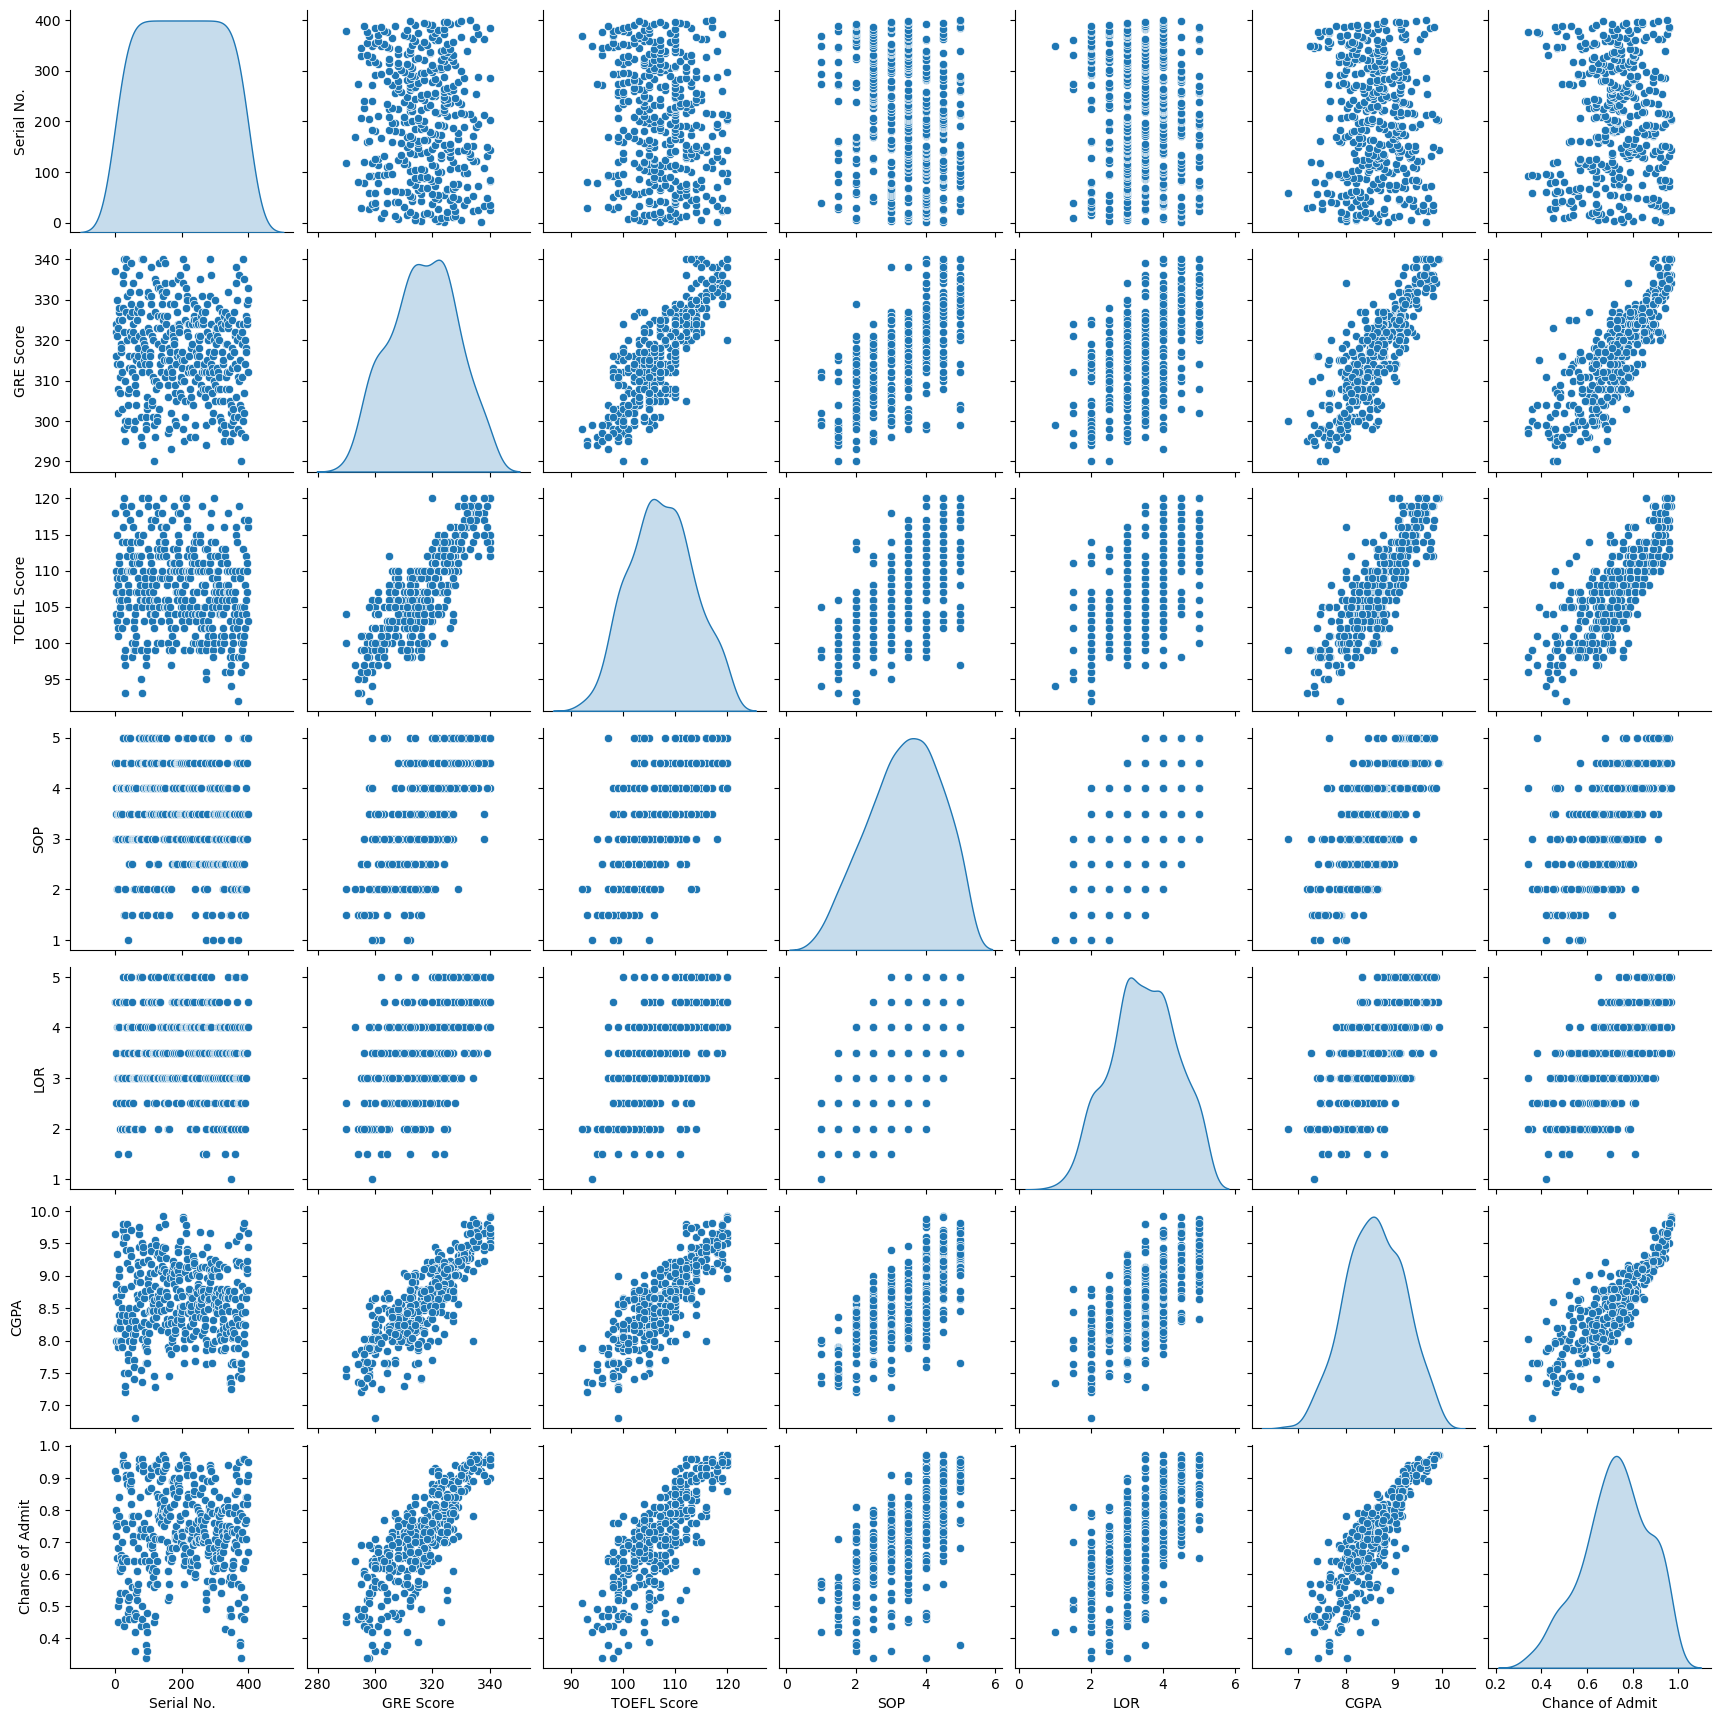

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
def eda_dataset(df):
    #Separating columns to be visualized
    out_cols=list(set(df.nunique()[df.nunique()<6].keys().tolist()
                      + df.select_dtypes(include='object').columns.tolist()))
    viz_cols=[x for x in df.columns if x not in out_cols]
    sns.pairplot(df[viz_cols], diag_kind='kde')
    plt.show()

eda_dataset(df)

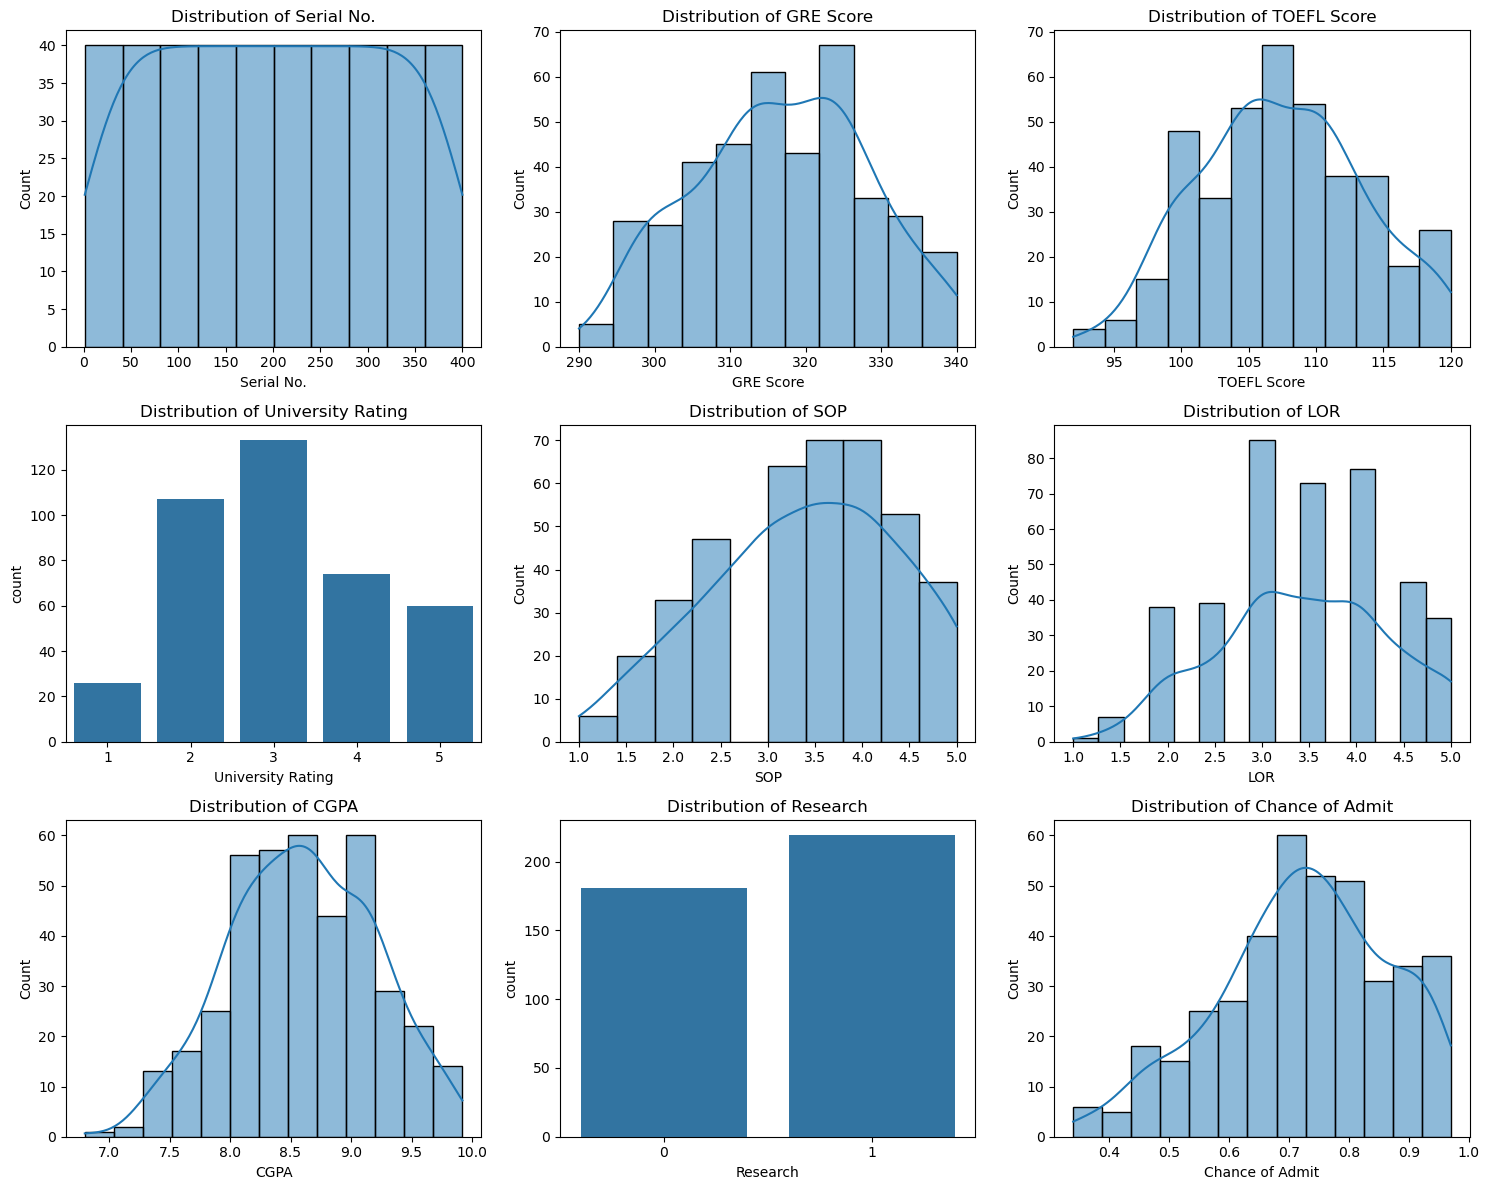

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data_summary(df):
    cols = df.columns
    plot_types = {
        'Serial No.': 'hist',
        'GRE Score': 'hist',
        'TOEFL Score': 'hist',
        'University Rating': 'bar',
        'SOP': 'hist',
        'LOR': 'hist',
        'CGPA': 'hist',
        'Research': 'bar',
        'Chance of Admit': 'hist'
    }
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    
    for idx, col in enumerate(cols):
        ax = axes[idx // 3, idx % 3]
        
        if plot_types[col] == 'hist':
            sns.histplot(df[col], kde=True, ax=ax)
            ax.set_title(f'Distribution of {col}')
        elif plot_types[col] == 'bar':
            sns.countplot(x=col, data=df, ax=ax)
            ax.set_title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

plot_data_summary(df)